<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gradient-Descent-for-Linear-Regression" data-toc-modified-id="Gradient-Descent-for-Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gradient Descent for Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Create-Some-Data" data-toc-modified-id="Create-Some-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Create Some Data</a></span></li><li><span><a href="#Gradient-Descent-for-One-Dimention" data-toc-modified-id="Gradient-Descent-for-One-Dimention-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gradient Descent for One Dimention</a></span></li><li><span><a href="#Implementation-of-Ridge-Regression" data-toc-modified-id="Implementation-of-Ridge-Regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Implementation of Ridge Regression</a></span></li></ul></li><li><span><a href="#Gradient-Descent-for-Logistic-Regression" data-toc-modified-id="Gradient-Descent-for-Logistic-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gradient Descent for Logistic Regression</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Cross-Entropy-Error" data-toc-modified-id="Cross-Entropy-Error-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Cross Entropy Error</a></span></li><li><span><a href="#Tensorflow-Introduction" data-toc-modified-id="Tensorflow-Introduction-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Tensorflow Introduction</a></span></li></ul></li></ul></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span></li><li><span><a href="#Mini-Batch-Gradient-Descent" data-toc-modified-id="Mini-Batch-Gradient-Descent-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mini Batch Gradient Descent</a></span></li><li><span><a href="#Least-Square-Solution-for-Linear-Regression" data-toc-modified-id="Least-Square-Solution-for-Linear-Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Least Square Solution for Linear Regression</a></span></li></ul></div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
plt.style.use(['ggplot'])

## Gradient Descent for Linear Regression

- **Hypothesis**:
$$
\hat{y}^i 
= h_{\boldsymbol{\theta}}(\mathbf{x}^i) = \boldsymbol{\theta} \cdot \mathbf{x}
= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n 
$$

- **MSE Cost Function for Linear Regression:**
\begin{equation}
J(\theta)
= \dfrac{1}{2m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})^2}
\end{equation}

$$
= \dfrac{1}{2m} \sum\limits_{i=1}^{m}{(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n - y^{(i)})^2} \\
= \frac{1}{m} \cdot (\boldsymbol{X}  \mathbf{\theta} - \mathbf{y})^T \cdot \boldsymbol{X}
\quad \text{where,} \quad
\begin{cases}
    \boldsymbol{X} \in R^{mxn} \\
    \mathbf{y} \in R^m \\
    \mathbf{\theta} \in R^n 
\end{cases}
$$

- **Gradient**:

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} 
= \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})} \cdot x_{j}^{i} 
= \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n - y^{(i)})} \cdot x_{j}^{i}
\end{equation}

- **Gradient Descent**:

$$
\theta_0: = \theta_0 -\alpha . \left( \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})} \cdot x_{0}^{i} \right)
$$

$$
\theta_1: = \theta_1 -\alpha . \left( \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})} \cdot x_{1}^{i} \right)
$$

$$
\theta_2: = \theta_2 -\alpha . \left( \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})} \cdot x_{2}^{i} \right)
$$

$$
\theta_j: = \theta_j -\alpha . \left( \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})} \cdot x_{0}^{i} \right)
$$

- How to update $\theta$ in Python Implementation:

    - $ 
    \mathbf{\theta}_{new}
    = \mathbf{\theta}_{old} - \alpha \cdot \frac{1}{m} \cdot (\boldsymbol{X} \mathbf{\theta} - \mathbf{y})^T \cdot \boldsymbol{X}
    \quad \text{where,} \quad
    \begin{cases}
        \boldsymbol{X} \in R^{mxn} \\
        \mathbf{y} \in R^m \\
        \mathbf{\theta} \in R^n \\
        \alpha = \text{learning rate}
    \end{cases}
    $

In [9]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    """
    Args:    
        X (np.narray)        : m by n matrix
        y (np.array)         : m dimentional vector
        theta (np.array)     : n dimentional vector
        learning_rate (float): learning rate of gradient descent
        iterations (int)     : number of iterations
    
    Returns:
        The final theta vector and array of cost history over no of iterations
    """
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    
    for it in range(iterations):
        
        prediction = np.dot(X, theta)
        
        theta -= (1/m)*learning_rate*( X.T.dot((prediction - y)))
        
        theta_history[it,:] = theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
    

In [8]:
def  cal_cost(theta, X, y):
    """Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    
    Args:
        theta : Vector of thetas 
        X     : Row of X's np.zeros((2,j))
        y     : Actual y's np.zeros((2,1))
    """
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

<h5> Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution

In [47]:
lr     = 0.01
n_iter = 1000
theta  = np.random.randn(2,1)
X_b    = np.c_[np.ones((len(X),1)), X]
# theta, X_b

In [45]:
theta, cost_history, theta_history = gradient_descent(X_b,y,theta,lr,n_iter)
# print('Theta0:    {:0.3f}, \nTheta1:    {:0.3f}'.format(theta[0][0], theta[1][0]))
# print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

theta # cost_history, theta_history

array([[4.10334342],
       [2.99121506]])

<h5> Let's plot the cost history over iterations

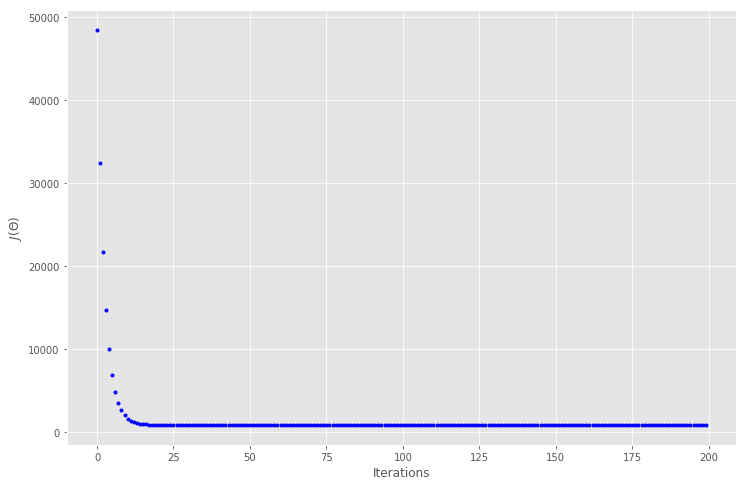

In [27]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('$ J(\Theta) $')
ax.set_xlabel('Iterations')
_ = ax.plot(range(n_iter), cost_history,'b.')

<h5> After around 150 iterations the cost is flat so the remaining iterations  are not needed or will not result in any further optimization. Let us zoom in till iteration 200 and see the curve

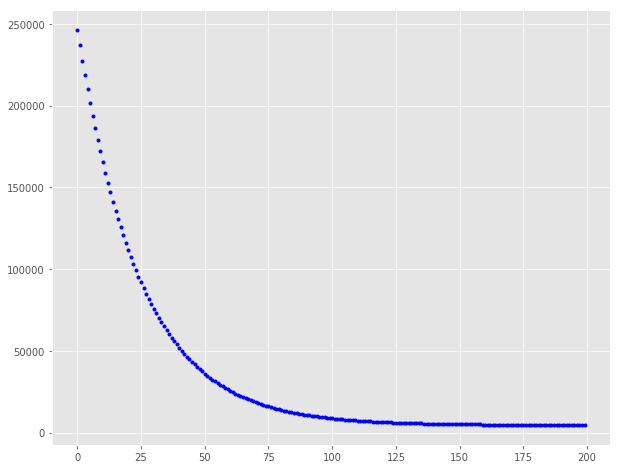

In [12]:

fig,ax = plt.subplots(figsize=(10,8))
_ = ax.plot(range(200), cost_history[:200],'b.')

<b>It is worth while to note that the cost drops faster initially and then the gain in cost reduction is not as much

It would be great to see the effect of different learning rates and iterations together. Let us  define a function which can show the effects together and also show how gradient decent actually is working

In [30]:

def plot_GD(n_iter,lr,ax,ax1=None):
    """
    n_iter = no of iterations
    lr = Learning Rate
    ax = Axis to plot the Gradient Descent
    ax1 = Axis to plot cost_history vs Iterations plot
    """
    
    _ = ax.plot(X,y,'b.')
     
    theta = np.random.randn(2,1)

     
    tr =0.1
    cost_history = np.zeros(n_iter)
     
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta, h, _ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     
    if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

<h5>Plot the graphs for different iterations and learning rates combination

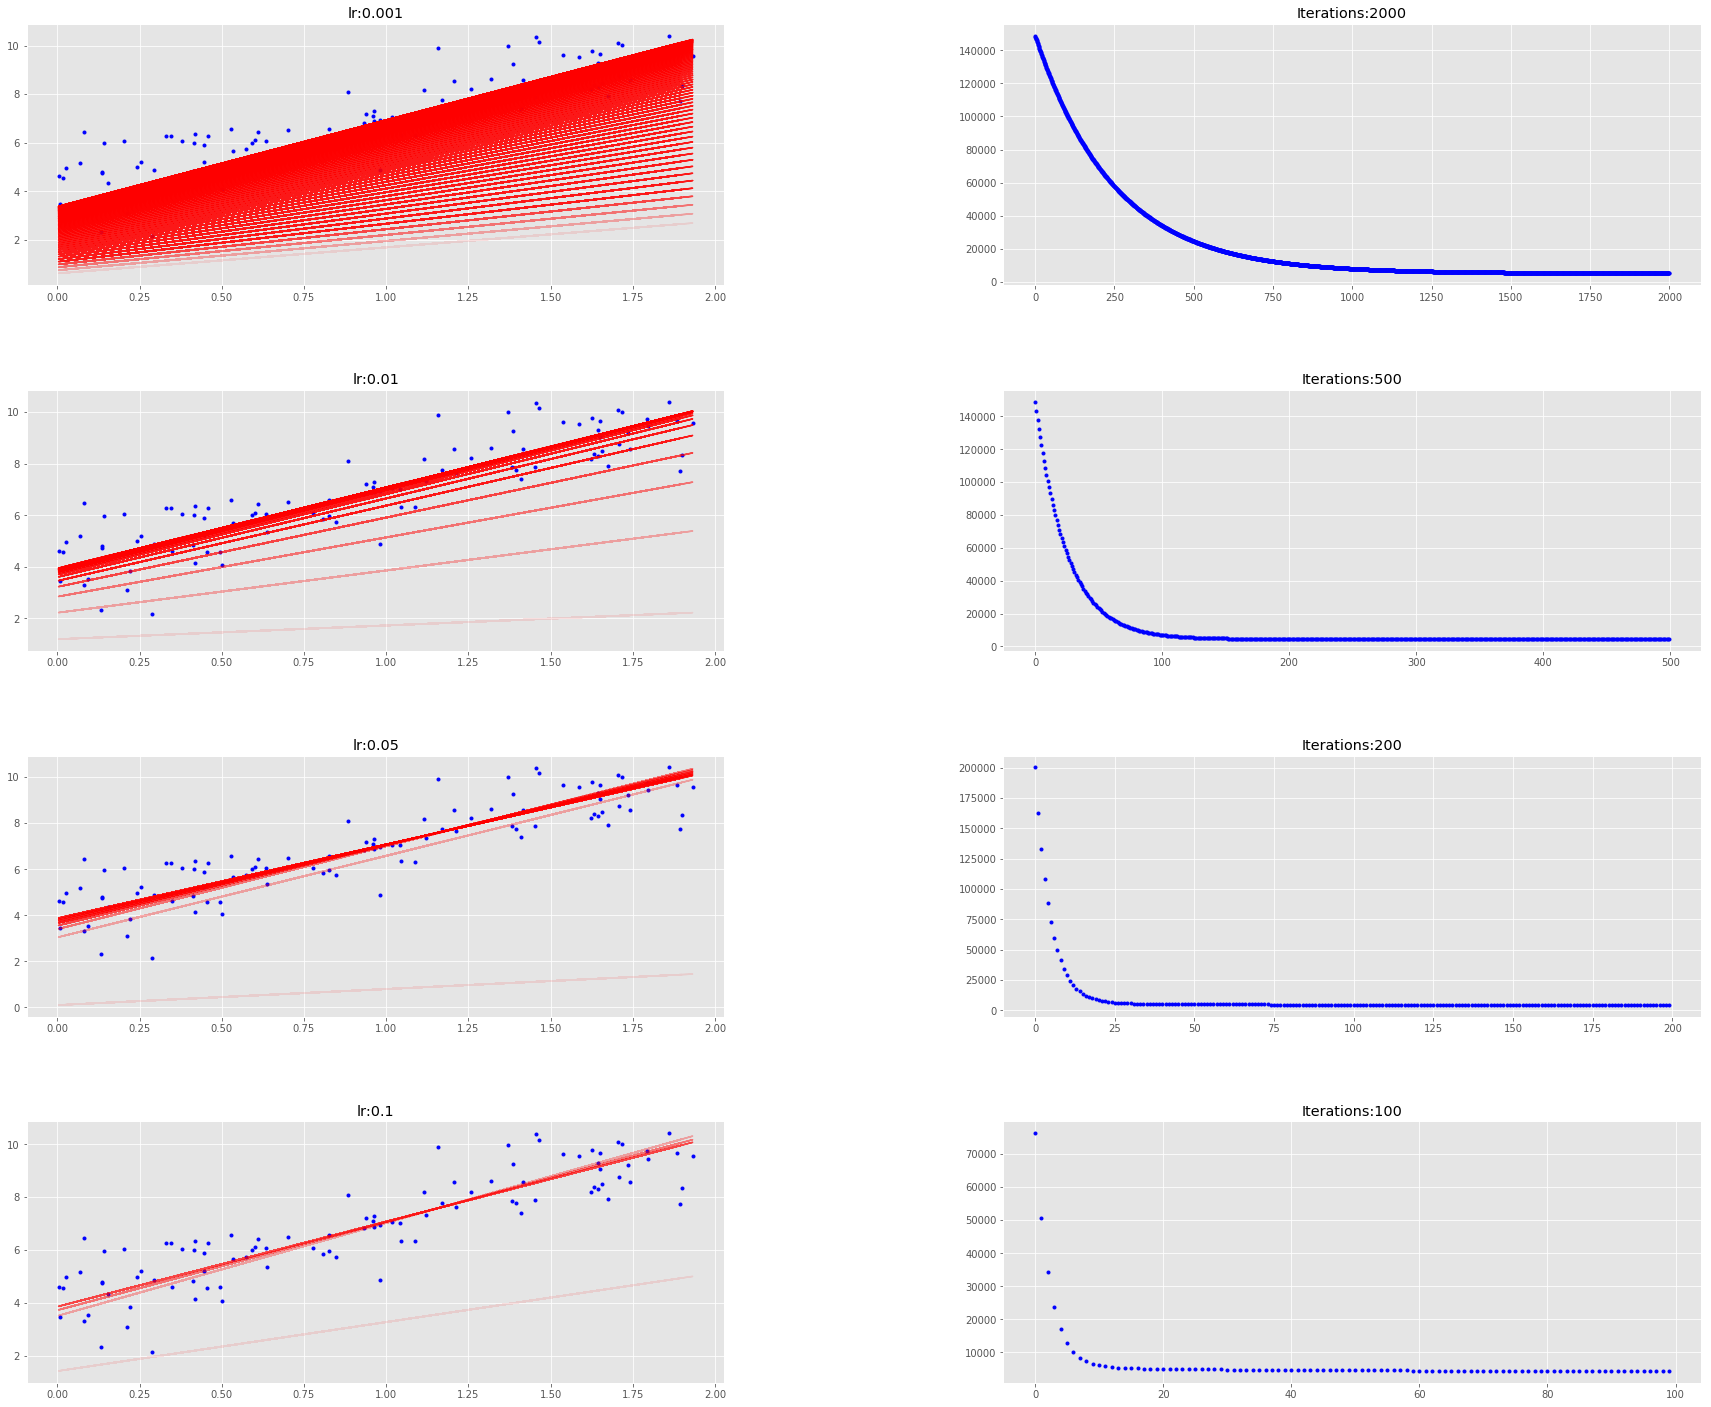

In [14]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)
    

<b> See how useful it is to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the gradient descent starts and then slowly gets closer to the final value

### Create Some Data

<h5> Generate some data with:
\begin{equation} \theta_0= 4 \end{equation} 
\begin{equation} \theta_1= 3 \end{equation} 

Add some Gaussian noise to the data

In [12]:
X = 2 * np.random.rand(100, 1); #X

In [14]:
y = 4 + 3*X + np.random.randn(100,1); #y

Let's plot our data to check the relation between X and Y

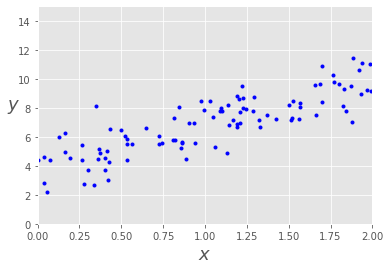

In [6]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

### Gradient Descent for One Dimention

In [57]:
"implementation of Simple Gradient Descent"

def gradient_descent(x: np.array, y: np.array):
    m_cur = b_cur = 0 # weight, m; bias, b
    num_iter = 100
    n = len(x)
    learning_rate = 0.08
    
    for i in range(num_iter):
        y_pred = m_cur * x + b_cur
        
        # MSE Loss function
        f = (1/n) * sum([diff ** 2 for diff in (y - y_pred)])
        
        df_dm = -(2/n) * sum(x * (y - y_pred)) 
        df_db = -(2/n) * sum((y - y_pred))
        
        m_cur -= learning_rate * df_dm
        b_cur -= learning_rate * df_db
        print(f"m = {m_cur}; b = {b_cur}; cost = {f}")

def _gradient_descent():
    x = np.random.random_sample((5,))
    y = np.random.random_sample((5,))
    gradient_descent(x, y)
    plt.figure(figsize=(10, 4))
    sns.regplot(x, y)
    plt.show()

# _gradient_descent()

You can always plot Indiviual graphs to zoom in

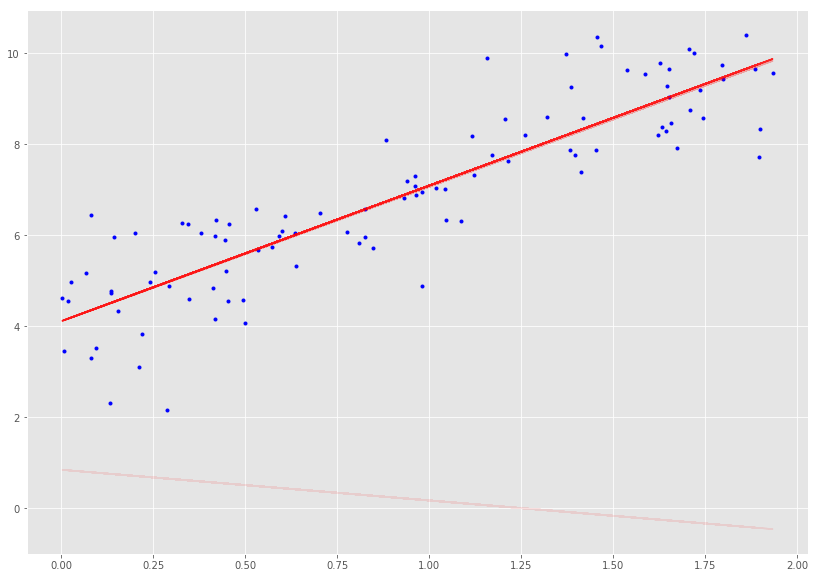

In [15]:
_, ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

### Implementation of Ridge Regression

- Linear Rigression with Gradient Descent

- [Alternate Approch](https://github.com/endlesseng/ml-vid-code/blob/master/notebooks/ridge_regression.ipynb)

In [58]:
class Ridge:
    """Linear least squares with L2 regularization."""
    
    def __init__(self, lam):
        """Initialize a Ridge object.
        
        Args:
            lam: the regularization factor 
        """
        self._lambda = lam
        
    @staticmethod
    def _x_bar(x):
        """Create the vector x_bar.
        
        Args:
            x: input vector
        """
        return np.hstack(([1.0], x, np.square(x)))
    
    def fit(self, x_train, y_train):
        """Generate a fit for the data.
        
        Args:
            x_train: the input values of the training data
            y_train: the output values of the training data
        """
        # stack the data
        X = np.vstack(([self._x_bar(x) for x in x_train]))
        Y = np.vstack(([y for y in y_train]))
        
        # compute the model coeff
        # theta = inv(xTx + lam*I) * xTy
        XT = np.transpose(X)
        XTX = np.matmul(XT, X) + self._lambda * np.identity(X.shape[1])
        self._coeff_hat = np.matmul(np.matmul(np.linalg.inv(XTX), XT), Y)

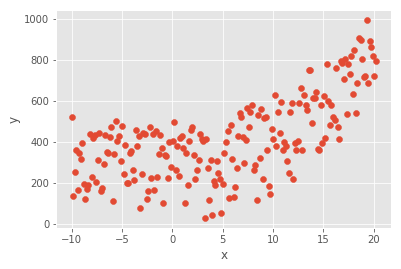

In [60]:
"""Generate fake data"""
c2 = 0.01
c1 = 1.3
c0 = 3.456
x_in = np.linspace(-10.0, 20.2, 200)
y_out = c1 * x_in ** 2 + c1 * x_in + c0 + 500.0 * np.random.rand(len(x_in))

plt.figure()
plt.scatter(x_in, y_out)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
"""Train using the custom Ridge class"""
x_train, x_test, y_train, y_test = train_test_split(
    x_in, y_out, test_size=0.20)

lam = 0.1
ridge = Ridge(lam)
ridge.fit(x_train, y_train)

In [64]:
"""Train using Sklearn ridge model"""

from sklearn import linear_model

reg = linear_model.Ridge(alpha=lam)
reg.fit([np.array([1.0, x, x**2]) for x in x_train], y_train)

Ridge(alpha=0.1)

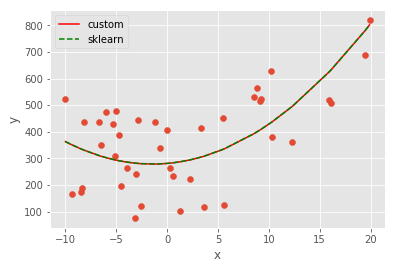

custom: [280.97889087], [3.28430741], [1.14930501]
sklearn: 281.3212874475721, 3.28900625940723, 1.1475515033568757


In [65]:

"""Plot test data and model predictions"""

plt.figure()
plt.scatter(x_test, y_test)
x_test_sorted = np.sort(x_test)
plt.plot(x_test_sorted,
         ridge._coeff_hat[0] + ridge._coeff_hat[1]*x_test_sorted + ridge._coeff_hat[2]*x_test_sorted**2,
         '-r', label='custom')
plt.plot(x_test_sorted,
         reg.intercept_ + reg.coef_[1]*x_test_sorted + reg.coef_[2]*x_test_sorted**2, '--g', label='sklearn')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# print the coeff
print(f'custom: {ridge._coeff_hat[0]}, {ridge._coeff_hat[1]}, {ridge._coeff_hat[2]}')
print(f'sklearn: {reg.intercept_ }, {reg.coef_[1]}, {reg.coef_[2]}')

In [67]:
"""Effect of regularization factor"""

coeff_store = []
norm_store = []
factors = np.linspace(0.0, 1.0, 10)
for l in factors:
    ridge = Ridge(l)
    ridge.fit(x_train, y_train)

    coeff_store.append(ridge._coeff_hat)
    norm_store.append(np.linalg.norm(ridge._coeff_hat))

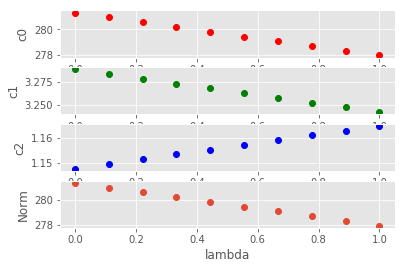

In [68]:
plt.figure()
plt.subplot(411)
coeff_0 = [c[0] for c in coeff_store]
plt.plot(factors, coeff_0, 'or')
plt.ylabel('c0')
plt.subplot(412)
coeff_1 = [c[1] for c in coeff_store]
plt.plot(factors, coeff_1, 'og')
plt.ylabel('c1')
plt.subplot(413)
coeff_2 = [c[2] for c in coeff_store]
plt.plot(factors, coeff_2, 'ob')
plt.ylabel('c2')
plt.subplot(414)
plt.plot(factors, norm_store, 'o')
plt.xlabel('lambda')
plt.ylabel('Norm')
plt.show()

## Gradient Descent for Logistic Regression

\begin{split}
    J(\boldsymbol{\theta})
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[ y^{(i)} log\left( \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right) + (1 - y^{(i)}) log\left(1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right)\right]}\\
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[ y^{(i)} log\left( (1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}})^{-1} \right) + (1 - y^{(i)}) log\left(1 - (1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}})^{-1} \right)\right]}
\end{split}

-----------------------------------------------------------------------------------------------
\begin{split}
    \frac{J}{d \mathbf{\boldsymbol{\theta}}} (\boldsymbol{\theta})
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[
         \frac{- y^{(i)} {(1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}})^{-2}(e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}})(-\mathbf{x^{(i)}})}} {\dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}}
         + \frac{(1 - y^{(i)})(-)(-) {(1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}})^{-2}(e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}})(-\mathbf{x^{(i)}}) }} {1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}}
         \right]} \\
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[
            \frac{y^{(i)}} {\dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}}
            - \frac{(1 - y^{(i)}) } {1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}}
        \right]} \cdot {(1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}})^{-2}{e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} } \cdot {\mathbf{x^{(i)}}} \\
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[
            \frac{y^{(i)}} {\dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}}
            - \frac{(1 - y^{(i)}) } {1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} }
        \right]} \cdot \frac{1}{\left(1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}} \right)} \cdot {\frac{e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}{ \left(1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}} \right)} } \cdot {\mathbf{x^{(i)}}} \\
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[
            \frac{y^{(i)}} {\dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}}
            - \frac{(1 - y^{(i)}) } {1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} }
        \right]} \cdot \frac{1}{\left(1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}} \right)} \cdot {\left( 1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right)} \cdot {\mathbf{x^{(i)}}} \\
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[
            \frac{y^{(i)} - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}} {\frac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \cdot {\left( 1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right)}}
        \right]} \cdot \frac{1}{\left(1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}} \right)} \cdot {\left( 1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right)} \cdot {\mathbf{x^{(i)}}} \\
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[
        y^{(i)} - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}
        \right]} \cdot {\mathbf{x^{(i)}}} \\
    & = \dfrac{1}{m} \sum_{i=1}^{m}{\left[
            \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} - y^{(i)}
            \right]} \cdot {\mathbf{x^{(i)}}}
\end{split}

In [ ]:
def sigmoid(z): return 1/(1+np.exp(-z))

z = np.arange(-5,5,0.1)

plt.plot(z,sigmoid(z))
plt.plot([0,0],[0,1],'r')
plt.plot([-6,6],[0.5,0.5],'r')

In [ ]:
N = 1000
D = 5

X = 5*np.random.randn(N,D)
w = np.random.randn(D,1)
y = X.dot(w)

y[y<=0] = 0 
y[y>0] = 1

In [ ]:
train_X = X[1:100]
test_X = X[100:]

In [ ]:
X.shape, train_X.shape, test_X.shape

(1000, 5)

(99, 5)

(900, 5)

In [ ]:
def dL_dw(X,e,a):
    return -X.T.dot(e*a*(1-a))/len(X)

def gradient_descent(gamma=5e-1, n_epochs=1000, batch_size=100, decay=0.9):
    epoch_run = int(len(X)/batch_size)
    
    # get starting conditions
    w = np.random.randn(D,1)
    params = []
    loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        params.append(w)
        
        for j in range(epoch_run):
            idx = np.random.choice(len(X), batch_size, replace=False)
            a = sigmoid(X[idx].dot(w)) # Activation function
            e = y[idx] - a # Really important that you use y_obs and not y (you do not have access to true y)
            # update parameters
            w = w - gamma*dL_dw(X[idx], e, a)
        loss[i] = 0.5*e.T.dot(e)/len(e)    
        gamma = gamma*decay # decay the learning parameter
        
    return params, loss
        
params, loss = gradient_descent()

In [ ]:
plt.plot(loss)

In [ ]:
np.hstack([params[-1],w])

array([[-0.31226165, -0.42375968],
       [-0.34929182, -0.45341411],
       [-1.3870532 , -1.79564317],
       [-0.24588416, -0.33009019],
       [ 0.53334152,  0.73282908]])

In [ ]:
idx = np.random.choice(len(X),20,replace=False)
a = sigmoid(X[idx].dot(w)) # Activation function
e = y[idx] - a
0.5*e.T.dot(e)/len(e)

array([[ 0.00271073]])

In [ ]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(params[-1])) # Get a probability measure given X
# y_inferred[y_inferred>0.5] = 1
# y_inferred[y_inferred<=0.5] = 0

# np.sum(y_test==y_inferred)

#### Cross Entropy Error

We shall focus on doing the same as above with a different loss function, the Cross Entropy Loss function.
$$\mathcal{L} = -\frac{1}{N}\sum_i y_i\log(a_i)+(1-y_i)\log(1-a_i)$$.

The following remains the same:
\begin{align}
z_i =& \mathbf{w}x_i\\
a_i =& \sigma(z_i)
\end{align}
and the derivative,

\begin{align}
    \frac{d \mathcal{L}}{d \mathbf{w}} =& \sum_i \frac{d\mathcal{L}}{da_i}\frac{da_i}{dz_i}\frac{dz_i}{d \mathbf{w}}\\
    =& \frac{1}{N}\sum_i -\left(\frac{y_i}{a_i}-\frac{1-y_i}{1-a_i}\right)\cdot\frac{\exp(-z)}{(1+\exp(-z))^2}\cdot x_i\\
    =& \frac{1}{N}\sum_i -\left(\frac{y_i-a_i}{a_i(1-a_i)}\right)\cdot a_i(1-a_i)\cdot x_i\\
    =& \frac{1}{N}\sum_i -(y_i-a_i)\cdot x_i
\end{align}

In [ ]:
# from IPython.core.debugger import Tracer;

def dL_dw(X,e,a):
    return -X.T.dot(e)/len(X)

def gradient_descent(gamma=1e-2, n_epochs=1000, batch_size=100, decay=0.9):
    epoch_run = int(len(X)/batch_size)
    
    # get starting conditions
    # NOTE: I initialised w such that its variance is 1/D
    w = np.random.randn(D,1)*(1/np.sqrt(D))
    params = []
    loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        params.append(w)
        
        for j in range(epoch_run):
            idx = np.random.choice(len(X),batch_size,replace=False)
            a = sigmoid(X[idx].dot(w)) # Activation function
            e = y[idx] - a # Really important that you use y_obs and not y (you do not have access to true y)  
            w = w - gamma*dL_dw(X[idx],e,a)
#         
        loss[i] = -np.mean(y[idx]*np.log(a+1e-10)+(1-y[idx])*np.log(1-a+1e-10))
        gamma = gamma*decay #decay the learning parameter
        
    return params, loss
        
params, loss = gradient_descent()

In [ ]:
plt.plot(loss)

In [ ]:
np.hstack([params[-1],w])

array([[-0.14663108, -0.42375968],
       [-0.12596242, -0.45341411],
       [-0.54578196, -1.79564317],
       [-0.11315139, -0.33009019],
       [ 0.19399247,  0.73282908]])

In [ ]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(params[-1])) # Get a probability measure given X
y_inferred[y_inferred>0.5] = 1
y_inferred[y_inferred<=0.5] = 0

np.sum(y_test==y_inferred)

99

#### Tensorflow Introduction

In [ ]:
import tensorflow as tf

In [ ]:
X.shape

(1000, 5)

In [ ]:
X_train.shape

(500, 5)

In [ ]:
def tf_train(X_train, y_train, batch_size=20):
    # Dataset (inputs and labels)
    x = tf.placeholder(tf.float32, [None, D])
    y_ = tf.placeholder(tf.float32, [None, 1])
    
    # random variable
    W = tf.Variable(tf.random_normal([D, 1],stddev=0.1))
    # map X to inferred output function
    a = tf.sigmoid(tf.matmul(x, W))

    # Define loss and optimizer
    cross_entropy = tf.reduce_mean(-(y_*tf.log(a)+(1-y_)*tf.log(1-a)))
    train_step = tf.train.GradientDescentOptimizer(1e-2).minimize(cross_entropy)
    
    sess = tf.InteractiveSession()
    tf.initialize_all_variables().run()
    # Train
    for epoch in range(1000):
        idx = np.random.choice(len(X_train),batch_size,replace=False)
        _,l = sess.run([train_step, cross_entropy], feed_dict={x: X_train[idx], y_: y_train[idx]})
        if epoch%100 == 0:
            print('loss: '+str(l))
        

In [ ]:
tf_train(X,y)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
loss: 0.903563
loss: 0.133423
loss: 0.0812295
loss: 0.0744086
loss: 0.0868373
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan


In [ ]:
def tf_train(X_train, y_train, batch_size=20, n_epoch=1000):
    x = tf.placeholder(tf.float32, [None, D])
    y_ = tf.placeholder(tf.float32, [None, 1])
    
    W = tf.Variable(tf.random_normal([D, 1],stddev=1/np.sqrt(D)))

    # Define loss and optimizer
    z = tf.matmul(x,W)

    cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels=y_))
    train_step = tf.train.GradientDescentOptimizer(1e-2).minimize(cross_entropy)

    sess = tf.InteractiveSession()
    tf.initialize_all_variables().run()
    # Train
    for epoch in range(n_epoch):
        idx = np.random.choice(len(X_train),batch_size,replace=False)
        _,l = sess.run([train_step, cross_entropy], feed_dict={x: X_train[idx], y_: y_train[idx]})
        if epoch%100 == 0:
            print('loss: '+str(l))
            
    return sess.run(W)

In [ ]:
w_est = tf_train(X,y)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
loss: 1.63057
loss: 0.139019
loss: 0.179242
loss: 0.144856
loss: 0.0849196
loss: 0.102604
loss: 0.0781684
loss: 0.0877755
loss: 0.0193359
loss: 0.0764944


In [ ]:
np.hstack([w_est,w])

array([[-0.29627892, -0.42375968],
       [-0.34968904, -0.45341411],
       [-1.36344194, -1.79564317],
       [-0.23447008, -0.33009019],
       [ 0.50962275,  0.73282908]])

In [ ]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(w_est)) # Get a probability measure given X
y_inferred[y_inferred>0.5] = 1
y_inferred[y_inferred<=0.5] = 0

np.sum(y_test==y_inferred)

99

## Stochastic Gradient Descent

In [16]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    """
    Args:    
        X: Matrix of X with added bias units
        y: Vector of Y
        theta: Vector of thetas np.random.randn(j,1)
        learning_rate (float): step size parameter of gradient descent.
        iterations = no of iterations
    
    Returns:
        The final theta vector and array of cost history over no of iterations
    """
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta -= (1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        
        cost_history[it]  = cost
        
    return theta, cost_history

In [17]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.066,
Theta1:          2.981
Final cost/MSE:  40.893


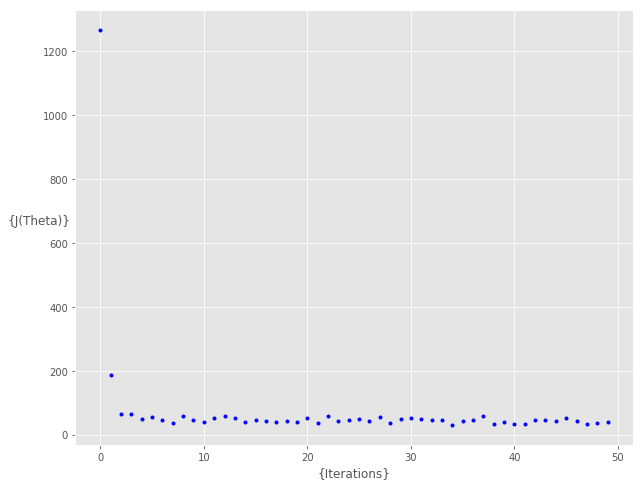

In [18]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

## Mini Batch Gradient Descent

In [19]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    """
    Args:    
        X: Matrix of X with added bias units
        y: Vector of Y
        theta: Vector of thetas np.random.randn(j,1)
        learning_rate (float): step size parameter of gradient descent.
        iterations = no of iterations
    
    Returns:
        The final theta vector and array of cost history over no of iterations
    """
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [20]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.103,
Theta1:          2.993
Final cost/MSE:  869.121


In [21]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

##  Least Square Solution for Linear Regression

In [10]:
X_b = np.c_[np.ones((100,1)), X]; X_b.shape

(100, 2)

**Normal Equation:**

$$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

In [53]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.11502339]
 [2.86907115]]


<h5>This is close to our real thetas 4 and 3. It cannot be accurate due to the noise I have introduced in data

In [54]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.11502339],
       [9.85316569]])

<h5>Let's plot prediction line with calculated: $\theta$

In [55]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


[0, 2, 0, 15]